In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
CLIENT_ID = 'ZHACMTBRB1UIX2QFP2SBZVQLQT12ZVWK3CMBVADOHZ4PBM5L' # your Foursquare ID
CLIENT_SECRET = 'GNJJEOMA3UGWRXBCCAHUDRFKUIDK0CNYVGEACBSDO5XUK3ST' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZHACMTBRB1UIX2QFP2SBZVQLQT12ZVWK3CMBVADOHZ4PBM5L
CLIENT_SECRET:GNJJEOMA3UGWRXBCCAHUDRFKUIDK0CNYVGEACBSDO5XUK3ST


# Creating Vancouver Folium Map
 

In [3]:
#vancouver
latitude= 49.2827
longitude=-123.1207

In [4]:
LIMIT = 100
radius = 650
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

results = requests.get(url).json()


In [5]:

map_vancouver= folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip():
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_vancouver)  
    
map_vancouver

In [6]:
results

{'meta': {'code': 200, 'requestId': '5f1d3feb9eba8045b9c262d9'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Downtown Vancouver',
  'headerFullLocation': 'Downtown Vancouver, Vancouver',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 175,
  'suggestedBounds': {'ne': {'lat': 49.288550005850006,
    'lng': -123.11174884413236},
   'sw': {'lat': 49.27684999414999, 'lng': -123.12965115586763}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4d5ec8ce29ef236ae0cb9059',
       'name': 'Rosewood Hotel Georgia',
       'location': {'address': '801 W Georgia St',
        'crossStreet': 'at Howe St',
        'lat': 49.28342914255638,
        'lng': -123.1189107326352,
 

# Load the venue category data from API

In [7]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [8]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Rosewood Hotel Georgia,Hotel,49.283429,-123.118911
1,Hawksworth Restaurant,Lounge,49.283362,-123.119462
2,Disney store,Toy / Game Store,49.281689,-123.119850
3,Abercrombie & Fitch,Clothing Store,49.282274,-123.118685
4,Wedgewood Hotel,Hotel,49.282163,-123.122237


In [9]:
nearby_venues['categories'].value_counts()

Hotel                        9
Food Truck                   6
Dessert Shop                 5
Restaurant                   4
Café                         4
Concert Hall                 3
Cosmetics Shop               3
Clothing Store               3
Coffee Shop                  3
Italian Restaurant           2
Japanese Restaurant          2
Burger Joint                 2
Gym                          2
Toy / Game Store             2
Sandwich Place               2
Steakhouse                   2
Donut Shop                   2
Mexican Restaurant           2
Seafood Restaurant           2
French Restaurant            2
Tea Room                     1
Hawaiian Restaurant          1
Gastropub                    1
Thai Restaurant              1
Noodle House                 1
Gift Shop                    1
Breakfast Spot               1
Lingerie Store               1
Deli / Bodega                1
Arts & Crafts Store          1
American Restaurant          1
Pub                          1
Leather 

# Vancouver neighborhood population downloaded and converted to CSV file
# website https://webtransfer.vancouver.ca/opendata/csv/CensusLocalAreaProfiles2016.csv

In [10]:
#Data downloaded from website https://webtransfer.vancouver.ca/opendata/csv/CensusLocalAreaProfiles2016.csv 
#and uploaded


f = pd.read_csv(r"/Users/alexli/Downloads/CensusLocalAreaProfiles2016.csv",engine='python')
ff=f.loc[0]
df=pd.DataFrame(data=ff)
df.reset_index(inplace=True)
df.columns=['Neighborhood', 'Population']
df = df.iloc[2:]
df.reset_index(drop=True, inplace=True)
van=df.loc[0:21]
van

,Neighborhood,Population
0,Arbutus-Ridge,"15,295"
1,Downtown,"62,030"
2,Dunbar-Southlands,"21,425"
3,Fairview,"33,620"
4,Grandview-Woodland,"29,175"
5,Hastings-Sunrise,"34,575"
6,Kensington-Cedar Cottage,"49,325"
7,Kerrisdale,"13,975"
8,Killarney,"29,325"
9,Kitsilano,"43,045"


# Loading neighborhood locations using geo locator

In [11]:

van['Latitude']=1.1111
van['Longitude']=1.1111
#van[[ 'Population']] = van[['Population']].apply(pd.to_numeric) 

van['Population'] = [x.replace(',', '') for x in van['Population']]

van['Population'] = van['Population'].astype(float)
print(van.dtypes)
van

Neighborhood     object
Population      float64
Latitude        float64
Longitude       float64
dtype: object


/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

,Neighborhood,Population,Latitude,Longitude
0,Arbutus-Ridge,15295.0,1.1111,1.1111
1,Downtown,62030.0,1.1111,1.1111
2,Dunbar-Southlands,21425.0,1.1111,1.1111
3,Fairview,33620.0,1.1111,1.1111
4,Grandview-Woodland,29175.0,1.1111,1.1111
5,Hastings-Sunrise,34575.0,1.1111,1.1111
6,Kensington-Cedar Cottage,49325.0,1.1111,1.1111
7,Kerrisdale,13975.0,1.1111,1.1111
8,Killarney,29325.0,1.1111,1.1111
9,Kitsilano,43045.0,1.1111,1.1111


In [12]:
for i in range(len(van['Neighborhood'])):
    geolocator = Nominatim(user_agent="vancouver bc")
    address = '{}, Vancouver, BC, Canada'.format(van['Neighborhood'][i])
    location = geolocator.geocode(address)
    van['Latitude'][i]= location.latitude
    van['Longitude'][i]= location.longitude

van


/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,Neighborhood,Population,Latitude,Longitude
0,Arbutus-Ridge,15295.0,49.240968,-123.167001
1,Downtown,62030.0,49.283393,-123.117456
2,Dunbar-Southlands,21425.0,49.253460,-123.185044
3,Fairview,33620.0,49.264113,-123.126835
4,Grandview-Woodland,29175.0,49.270559,-123.067942
5,Hastings-Sunrise,34575.0,49.277594,-123.043920
6,Kensington-Cedar Cottage,49325.0,49.247632,-123.084207
7,Kerrisdale,13975.0,49.234673,-123.155389
8,Killarney,29325.0,49.224274,-123.046250
9,Kitsilano,43045.0,49.269410,-123.155267


In [13]:
van['Latitude'][0]=49.245968
van['Longitude'][0]=-123.155001
van['Longitude'][13]=-123.04
van['Latitude'][7]=49.229673
van['Latitude'][2]=49.253460
van['Longitude'][21]=-123.19733
van

/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Neighborhood,Population,Latitude,Longitude
0,Arbutus-Ridge,15295.0,49.245968,-123.155001
1,Downtown,62030.0,49.283393,-123.117456
2,Dunbar-Southlands,21425.0,49.253460,-123.185044
3,Fairview,33620.0,49.264113,-123.126835
4,Grandview-Woodland,29175.0,49.270559,-123.067942
5,Hastings-Sunrise,34575.0,49.277594,-123.043920
6,Kensington-Cedar Cottage,49325.0,49.247632,-123.084207
7,Kerrisdale,13975.0,49.229673,-123.155389
8,Killarney,29325.0,49.224274,-123.046250
9,Kitsilano,43045.0,49.269410,-123.155267


# Locating the general location of the neighborhood on the folium map

In [14]:

map_van = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(van['Latitude'], van['Longitude'], van['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_van)  
    
map_van

In [15]:
import urllib
import json
from urllib.request import urlopen
#!.getJSON("https://github.com/codeforamerica/click_that_hood/edit/master/public/data/vancouver.geojson", function(data){console.log(data);});


url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/vancouver.geojson'
resp = requests.get(url)
geo_json_data = json.loads(resp.text)

In [16]:


geo_json_data


folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': 'green' if 'e' in feature['properties']['name'].lower() else '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(map_van)

map_van

# Getting nearby venue categories from the each neighborhood

In [17]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [18]:

van_venues= getNearbyVenues(names=van['Neighborhood'],
                                   latitudes=van['Latitude'],
                                   longitudes=van['Longitude']
                                  )

Arbutus-Ridge 
Downtown 
Dunbar-Southlands 
Fairview 
Grandview-Woodland 
Hastings-Sunrise 
Kensington-Cedar Cottage 
Kerrisdale 
Killarney 
Kitsilano 
Marpole 
Mount Pleasant 
Oakridge 
Renfrew-Collingwood 
Riley Park 
Shaughnessy 
South Cambie 
Strathcona 
Sunset 
Victoria-Fraserview
West End 
West Point Grey 


In [19]:
van_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arbutus-Ridge,49.245968,-123.155001,Quilchena Park,49.245194,-123.151211,Park
1,Arbutus-Ridge,49.245968,-123.155001,The Arbutus Club,49.248507,-123.152152,Event Space
2,Arbutus-Ridge,49.245968,-123.155001,Starbucks,49.244768,-123.153891,Coffee Shop
3,Arbutus-Ridge,49.245968,-123.155001,Subway,49.244558,-123.153975,Sandwich Place
4,Arbutus-Ridge,49.245968,-123.155001,Dollarama,49.248885,-123.154049,Discount Store
5,Arbutus-Ridge,49.245968,-123.155001,Finest at Sea,49.244615,-123.153769,Seafood Restaurant
6,Arbutus-Ridge,49.245968,-123.155001,M&M Food Market,49.244695,-123.153883,Grocery Store
7,Arbutus-Ridge,49.245968,-123.155001,Arbutus Club Gymnasium,49.248237,-123.152619,Basketball Court
8,Arbutus-Ridge,49.245968,-123.155001,BC Liquor Store,49.248733,-123.154671,Liquor Store
9,Arbutus-Ridge,49.245968,-123.155001,A&W,49.248756,-123.154124,Fast Food Restaurant


In [20]:
category= van_venues.groupby(["Neighborhood", "Venue Category"]).size().reset_index(name="Count")

In [21]:
category.head(30)

,Neighborhood,Venue Category,Count
0,Arbutus-Ridge,Bakery,1
1,Arbutus-Ridge,Basketball Court,1
2,Arbutus-Ridge,Burger Joint,1
3,Arbutus-Ridge,Coffee Shop,1
4,Arbutus-Ridge,Dance Studio,1
5,Arbutus-Ridge,Discount Store,1
6,Arbutus-Ridge,Event Space,1
7,Arbutus-Ridge,Fast Food Restaurant,1
8,Arbutus-Ridge,Grocery Store,1
9,Arbutus-Ridge,Liquor Store,1


In [22]:

cat_rest = van_venues[(van_venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby(['Neighborhood']).count()
cat_rest.drop(['Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
cat_rest.head()

,Venue Category
Neighborhood,
Arbutus-Ridge,2
Downtown,23
Dunbar-Southlands,3
Fairview,12
Grandview-Woodland,28


# Analyzing data obtained from API

In [23]:
#Most common venues by 
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
van_onehot=pd.get_dummies(van_venues[['Venue Category']], prefix="", prefix_sep="")

van_onehot['Neighborhood']=van_venues['Neighborhood']

fixed_columns=[van_onehot.columns[-1]]+list(van_onehot.columns[:-1])
van_onehot=van_onehot[fixed_columns]
van_onehot.head(30)





,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bistro,Board Shop,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Inn,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Ski Area,Soup Place,South Indian Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Shop,Women's Store,Yoga Studio
0,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Arbutus-Ridge,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [25]:
van_grouped =van_onehot.groupby('Neighborhood').mean().reset_index()
van_grouped_cluster = van_grouped.drop('Neighborhood', 1)

van_grouped_cluster['Population']= van['Population']
van_grouped_cluster



,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Basketball Court,Beach,Bistro,Board Shop,Bookstore,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Station,Bus Stop,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Cuban Restaurant,Dance Studio,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Flower Shop,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,Gift Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hobby Shop,Hot Dog Joint,Hotel,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Inn,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewelry Store,Korean Restaurant,Latin American Restaurant,Leather Goods Store,Lebanese Restaurant,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Music Venue,Nail Salon,New American Restaurant,Noodle House,Optical Shop,Outdoor Sculpture,Paper / Office Supplies Store,Park,Performing Arts Venue,Peruvian Restaurant,Pharmacy,Pizza Place,Plaza,Poke Place,Pool,Pool Hall,Pub,Ramen Restaurant,Record Shop,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shanghai Restaurant,Shopping Mall,Ski Area,Soup Place,South Indian Restaurant,Sporting Goods Shop,Sports Bar,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Track,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfall,Wine Shop,Women's Store,Yoga Studio,Population
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.00,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.071429,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.00,0.071429,0.000000,0.071429,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15295.0
1,0.010000,0.010000,0.000000,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.020000,0.010000,0.010000,0.000000,0.01,0.020000,0.000000,0.000000,0.000000,0.010000,0.050000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.000000,0.050000,0.030000,0.000000,0.01,0.000000,0.010000,0.010000,0.030000,0.000000,0.000000,0.000000,0.020000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01,0.0200

In [26]:
num_top_venues = 5

for hood in van_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = van_grouped[van_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arbutus-Ridge ----
                  venue  freq
0        Discount Store  0.07
1  Fast Food Restaurant  0.07
2                  Park  0.07
3          Burger Joint  0.07
4         Shopping Mall  0.07


----Downtown ----
          venue  freq
0         Hotel  0.08
1          Café  0.05
2   Coffee Shop  0.05
3    Restaurant  0.04
4  Dessert Shop  0.03


----Dunbar-Southlands ----
                venue  freq
0         Coffee Shop  0.14
1   Indian Restaurant  0.14
2    Sushi Restaurant  0.14
3  Salon / Barbershop  0.14
4      Ice Cream Shop  0.14


----Fairview ----
                venue  freq
0         Coffee Shop  0.15
1    Asian Restaurant  0.08
2                Park  0.08
3  Falafel Restaurant  0.04
4  Chinese Restaurant  0.04


----Grandview-Woodland ----
                venue  freq
0         Coffee Shop  0.10
1  Italian Restaurant  0.06
2                Café  0.04
3    Sushi Restaurant  0.04
4         Pizza Place  0.04


----Hastings-Sunrise ----
                   venue  freq
0  

In [27]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = van_grouped['Neighborhood']

for ind in np.arange(van_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(van_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(24)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,Burger Joint,Basketball Court,Park,Coffee Shop,Discount Store,Event Space,Sandwich Place,Fast Food Restaurant,Seafood Restaurant,Shopping Mall
1,Downtown,Hotel,Coffee Shop,Café,Restaurant,Sandwich Place,Steakhouse,Concert Hall,Dessert Shop,Burger Joint,Donut Shop
2,Dunbar-Southlands,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Coffee Shop,Salon / Barbershop,Sporting Goods Shop,Ice Cream Shop,BBQ Joint,Event Space,Food & Drink Shop
3,Fairview,Coffee Shop,Park,Asian Restaurant,Japanese Restaurant,Malay Restaurant,Salon / Barbershop,Falafel Restaurant,Restaurant,Camera Store,Chinese Restaurant
4,Grandview-Woodland,Coffee Shop,Italian Restaurant,Pizza Place,Park,Café,Indian Restaurant,Japanese Restaurant,Sushi Restaurant,Bakery,Pub
5,Hastings-Sunrise,Vietnamese Restaurant,Food Truck,Gas Station,Pizza Place,Park,Coffee Shop,Event Space,Sandwich Place,Liquor Store,Sushi Restaurant
6,Kensington-Cedar Cottage,Bus Stop,Coffee Shop,Vietnamese Restaurant,Chinese Restaurant,American Restaurant,Japanese Restaurant,Greek Restaurant,Malay Restaurant,Filipino Restaurant,Electronics Store
7,Kerrisdale,Bus Stop,Grocery Store,Chinese Restaurant,Bakery,Café,Bubble Tea Shop,Gift Shop,Pizza Place,Gym Pool,Japanese Restaurant
8,Killarney,Italian Restaurant,Track,Pool,Gym,Dessert Shop,Event Space,Dance Studio,Flower Shop,Filipino Restaurant,Fast Food Restaurant
9,Kitsilano,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Thai Restaurant,Restaurant


In [28]:
van.head()

,Neighborhood,Population,Latitude,Longitude
0,Arbutus-Ridge,15295.0,49.245968,-123.155001
1,Downtown,62030.0,49.283393,-123.117456
2,Dunbar-Southlands,21425.0,49.253460,-123.185044
3,Fairview,33620.0,49.264113,-123.126835
4,Grandview-Woodland,29175.0,49.270559,-123.067942


In [29]:
# dtermine the number of cluster
from sklearn.metrics import silhouette_samples, silhouette_score
max_range=10
indices = []
scores = []

for kclusters in range(2, max_range) :
    
    # Run k-means clustering
    kmc = van_grouped_cluster
    kmeans = KMeans(n_clusters = kclusters, init = 'k-means++', random_state = 0).fit_predict(kmc)
    
    # Gets the score for the clustering operation performed
    score = silhouette_score(kmc, kmeans)
    
    # Appending the index and score to the respective lists
    indices.append(kclusters)
    scores.append(score)
    

    print(scores)

[0.5789083298093689]
[0.5789083298093689, 0.6390757788289488]
[0.5789083298093689, 0.6390757788289488, 0.640779683730221]
[0.5789083298093689, 0.6390757788289488, 0.640779683730221, 0.6327930532637294]
[0.5789083298093689, 0.6390757788289488, 0.640779683730221, 0.6327930532637294, 0.6654945693870247]
[0.5789083298093689, 0.6390757788289488, 0.640779683730221, 0.6327930532637294, 0.6654945693870247, 0.6494186318822415]
[0.5789083298093689, 0.6390757788289488, 0.640779683730221, 0.6327930532637294, 0.6654945693870247, 0.6494186318822415, 0.6152971255983611]
[0.5789083298093689, 0.6390757788289488, 0.640779683730221, 0.6327930532637294, 0.6654945693870247, 0.6494186318822415, 0.6152971255983611, 0.5712726131528447]


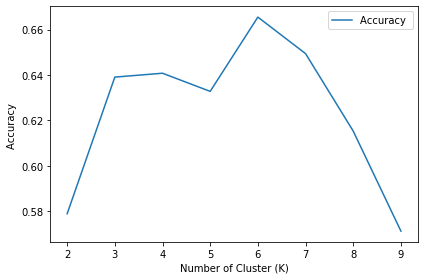

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(2,10),scores)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Cluster (K)')
plt.tight_layout()
plt.show()

# Clustering the neighborhood based on the population data

In [31]:
#Cluster 
from sklearn.cluster import KMeans 

# set number of clusters
kclusters = 6

van_cluster = van.drop([ 'Latitude','Longitude','Neighborhood'], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(van_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

van['Cluster Labels']=kmeans.labels_
van.head(30)

/Users/alexli/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Neighborhood,Population,Latitude,Longitude,Cluster Labels
0,Arbutus-Ridge,15295.0,49.245968,-123.155001,4
1,Downtown,62030.0,49.283393,-123.117456,5
2,Dunbar-Southlands,21425.0,49.253460,-123.185044,1
3,Fairview,33620.0,49.264113,-123.126835,3
4,Grandview-Woodland,29175.0,49.270559,-123.067942,3
5,Hastings-Sunrise,34575.0,49.277594,-123.043920,3
6,Kensington-Cedar Cottage,49325.0,49.247632,-123.084207,0
7,Kerrisdale,13975.0,49.229673,-123.155389,4
8,Killarney,29325.0,49.224274,-123.046250,3
9,Kitsilano,43045.0,49.269410,-123.155267,0


In [32]:

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)
colours = ['red', 'black', 'blue','green','purple','orange']
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(van['Latitude'], van['Longitude'], van['Neighborhood'], van['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colours[cluster],
        fill=True,
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Loading GeoJson data from github

In [33]:
import urllib
import json
from urllib.request import urlopen
#!.getJSON("https://github.com/codeforamerica/click_that_hood/edit/master/public/data/vancouver.geojson", function(data){console.log(data);});


url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/vancouver.geojson'
resp = requests.get(url)
geo_json_data = json.loads(resp.text)

# Adding Geojson onto of the Cluster Markers

In [34]:
m = folium.Map([latitude, longitude], zoom_start=12)

geo_json_data


folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': 'green' if 'e' in feature['properties']['name'].lower() else '#ffff00',
        'color': 'black',
        'weight': 2,
        'dashArray': '5, 5'
    }
).add_to(map_clusters)

map_clusters

# Analyze each individual cluster data by the common venues

In [35]:
# add clustering labels


van_merged = van

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
van_merged =van_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')


van_merged.drop(columns=['Latitude', 'Longitude'], inplace=True)


In [36]:
van_merged.loc[van_merged['Cluster Labels'] == 0, van_merged.columns[[0] + list(range(1, van_merged.shape[1]))]]

,Neighborhood,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Kensington-Cedar Cottage,49325.0,0,Bus Stop,Coffee Shop,Vietnamese Restaurant,Chinese Restaurant,American Restaurant,Japanese Restaurant,Greek Restaurant,Malay Restaurant,Filipino Restaurant,Electronics Store
9,Kitsilano,43045.0,0,Bakery,American Restaurant,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Ice Cream Shop,French Restaurant,Food Truck,Thai Restaurant,Restaurant
13,Renfrew-Collingwood,51530.0,0,Bus Stop,Metro Station,Bar,Bus Station,Park,Food & Drink Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
20,West End,47200.0,0,Bakery,Japanese Restaurant,Greek Restaurant,Dessert Shop,Gay Bar,Sushi Restaurant,Ramen Restaurant,Indian Restaurant,Farmers Market,Restaurant


In [37]:
van_merged.loc[van_merged['Cluster Labels'] == 1, van_merged.columns[[0] + list(range(1, van_merged.shape[1]))]]

,Neighborhood,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Dunbar-Southlands,21425.0,1,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Coffee Shop,Salon / Barbershop,Sporting Goods Shop,Ice Cream Shop,BBQ Joint,Event Space,Food & Drink Shop
10,Marpole,24460.0,1,Pizza Place,Sushi Restaurant,Bubble Tea Shop,Vietnamese Restaurant,Chinese Restaurant,Sandwich Place,Gas Station,Noodle House,Dessert Shop,Dim Sum Restaurant
14,Riley Park,22555.0,1,Coffee Shop,Pub,Café,Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Thai Restaurant,Arts & Crafts Store,Sushi Restaurant,Lounge


In [38]:
van_merged.loc[van_merged['Cluster Labels'] == 2, van_merged.columns[[0] + list(range(1, van_merged.shape[1]))]]

,Neighborhood,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Shaughnessy,8430.0,2,French Restaurant,Park,Ethiopian Restaurant,Food & Drink Shop,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space
16,South Cambie,7970.0,2,Coffee Shop,Bus Stop,Gift Shop,Park,Vietnamese Restaurant,Cafeteria,Malay Restaurant,Grocery Store,Bank,Shopping Mall


In [39]:
van_merged.loc[van_merged['Cluster Labels'] == 3, van_merged.columns[[0] + list(range(1, van_merged.shape[1]))]]

,Neighborhood,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Fairview,33620.0,3,Coffee Shop,Park,Asian Restaurant,Japanese Restaurant,Malay Restaurant,Salon / Barbershop,Falafel Restaurant,Restaurant,Camera Store,Chinese Restaurant
4,Grandview-Woodland,29175.0,3,Coffee Shop,Italian Restaurant,Pizza Place,Park,Café,Indian Restaurant,Japanese Restaurant,Sushi Restaurant,Bakery,Pub
5,Hastings-Sunrise,34575.0,3,Vietnamese Restaurant,Food Truck,Gas Station,Pizza Place,Park,Coffee Shop,Event Space,Sandwich Place,Liquor Store,Sushi Restaurant
8,Killarney,29325.0,3,Italian Restaurant,Track,Pool,Gym,Dessert Shop,Event Space,Dance Studio,Flower Shop,Filipino Restaurant,Fast Food Restaurant
11,Mount Pleasant,32955.0,3,Coffee Shop,Diner,Sushi Restaurant,Breakfast Spot,Sandwich Place,Indian Restaurant,Brewery,Lounge,Gym,Vietnamese Restaurant
18,Sunset,36500.0,3,Indian Restaurant,South Indian Restaurant,Ski Area,Cosmetics Shop,Hotel,Hot Dog Joint,Ice Cream Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market
19,Victoria-Fraserview,31065.0,3,Convenience Store,Pizza Place,Fast Food Restaurant,Gas Station,Sandwich Place,Yoga Studio,Event Space,Flower Shop,Filipino Restaurant,Farmers Market


In [40]:
van_merged.loc[van_merged['Cluster Labels'] == 4, van_merged.columns[[0] + list(range(1, van_merged.shape[1]))]]

,Neighborhood,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arbutus-Ridge,15295.0,4,Burger Joint,Basketball Court,Park,Coffee Shop,Discount Store,Event Space,Sandwich Place,Fast Food Restaurant,Seafood Restaurant,Shopping Mall
7,Kerrisdale,13975.0,4,Bus Stop,Grocery Store,Chinese Restaurant,Bakery,Café,Bubble Tea Shop,Gift Shop,Pizza Place,Gym Pool,Japanese Restaurant
12,Oakridge,13030.0,4,Convenience Store,Pharmacy,Concert Hall,Vietnamese Restaurant,Fast Food Restaurant,Park,Gym,Sushi Restaurant,Sandwich Place,Electronics Store
17,Strathcona,12585.0,4,Coffee Shop,Park,Sandwich Place,Brewery,Pub,Cheese Shop,Restaurant,Café,Soup Place,Food Truck
21,West Point Grey,13065.0,4,Optical Shop,Gym / Fitness Center,Yoga Studio,Ethiopian Restaurant,Flower Shop,Filipino Restaurant,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Event Space


In [41]:
van_merged.loc[van_merged['Cluster Labels'] == 5, van_merged.columns[[0] + list(range(1, van_merged.shape[1]))]]

,Neighborhood,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Downtown,62030.0,5,Hotel,Coffee Shop,Café,Restaurant,Sandwich Place,Steakhouse,Concert Hall,Dessert Shop,Burger Joint,Donut Shop
